# 샘플 이미지셋 실습
- MNIST: 손글씨 이미지셋 (60000, 28, 28)
- CIFAR10: 10가지 분류 사물 이미지셋 (50000, 32, 32)

In [16]:
import tensorflow as tf

In [19]:
(mnist_x, mnist_y), _ = tf.keras.datasets.mnist.load_data()
print(mnist_x.shape, mnist_y.shape)

(cifar_x, cifar_y), _ = tf.keras.datasets.cifar10.load_data()
print (cifar_x.shape, cifar_y.shape)

(60000, 28, 28) (60000,)
(50000, 32, 32, 3) (50000, 1)


## 1. 화면 출력

5


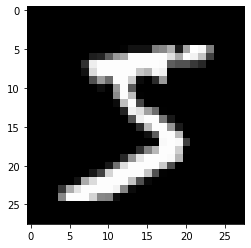

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(mnist_x[0], cmap='gray')
print(mnist_y[0])

[6]


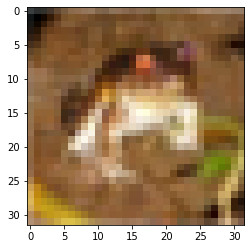

In [28]:
plt.imshow(cifar_x[0])
print(cifar_y[0])

# Flatten Layer를 활용한 이미지 학습¶

In [43]:
import tensorflow as tf
import pandas as pd

In [64]:
# 데이터를 준비하고
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()

# Flatten 레이어 사용... 따라서 주석 처리
# 784 = 28 * 28
# 독립 = 독립.reshape(60000, 784)

# numpy array로 변환 (DataFrame 사용시 model.fit(...)에서 에러)
종속 = pd.get_dummies(종속).to_numpy() 
print(독립.shape, 종속.shape)
print(type(독립), type(종속))

(60000, 28, 28) (60000, 10)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [65]:
# 모델을 만들고
X = tf.keras.layers.Input(shape=[28, 28])
H = tf.keras.layers.Flatten()(X)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 84)                65940     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                850       
Total params: 66,790
Trainable params: 66,790
Non-trainable params: 0
_________________________________________________________________


In [66]:
# 모델을 학습하고
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.4287 - accuracy: 0.8511
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5318 - accuracy: 0.9166
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4405 - accuracy: 0.9290
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4065 - accuracy: 0.9387
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4020 - accuracy: 0.9409
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3794 - accuracy: 0.9436
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3678 - accuracy: 0.9470
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3585 - accuracy: 0.9485
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3491 - accuracy: 0.9499
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.336

In [67]:
# 모델을 이용합니다. 
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


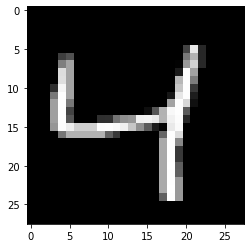

In [70]:
plt.imshow(mnist_x[2], cmap='gray')